# K-MEANS CLUSTERING

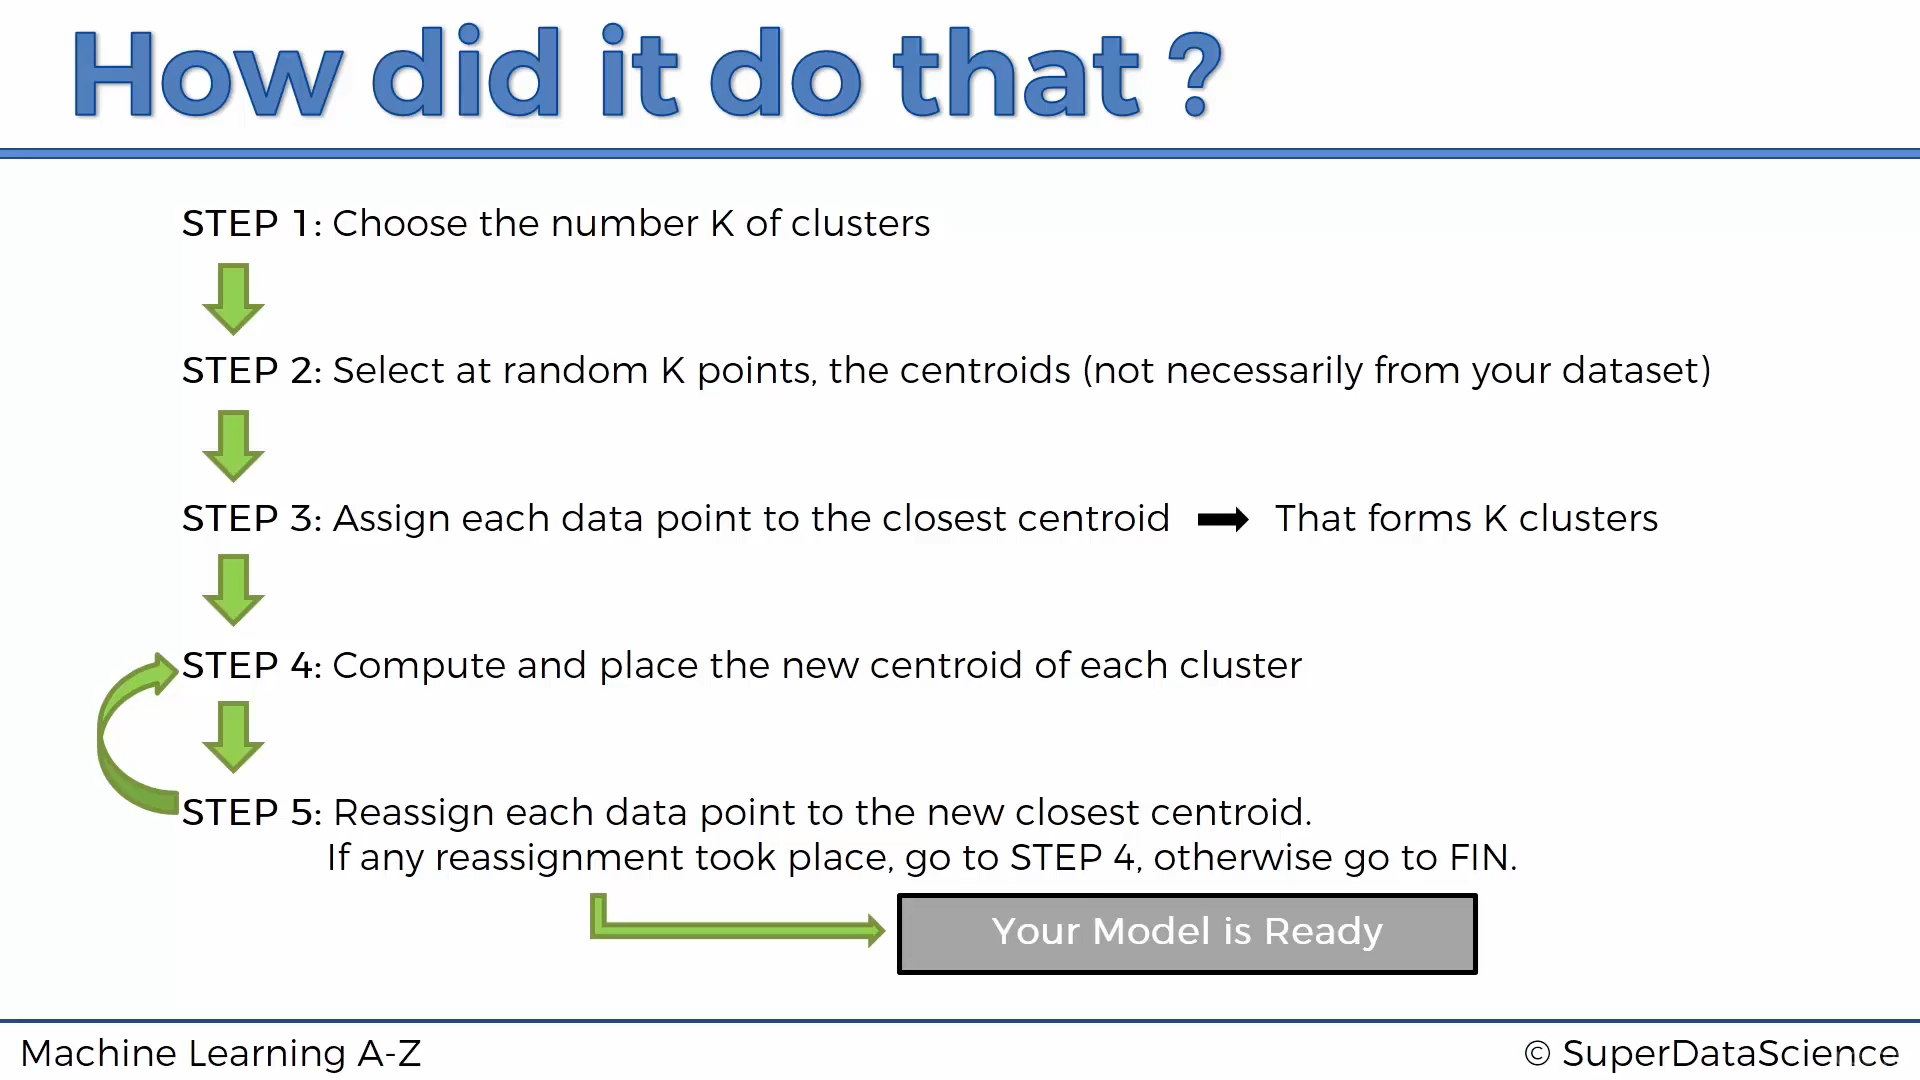

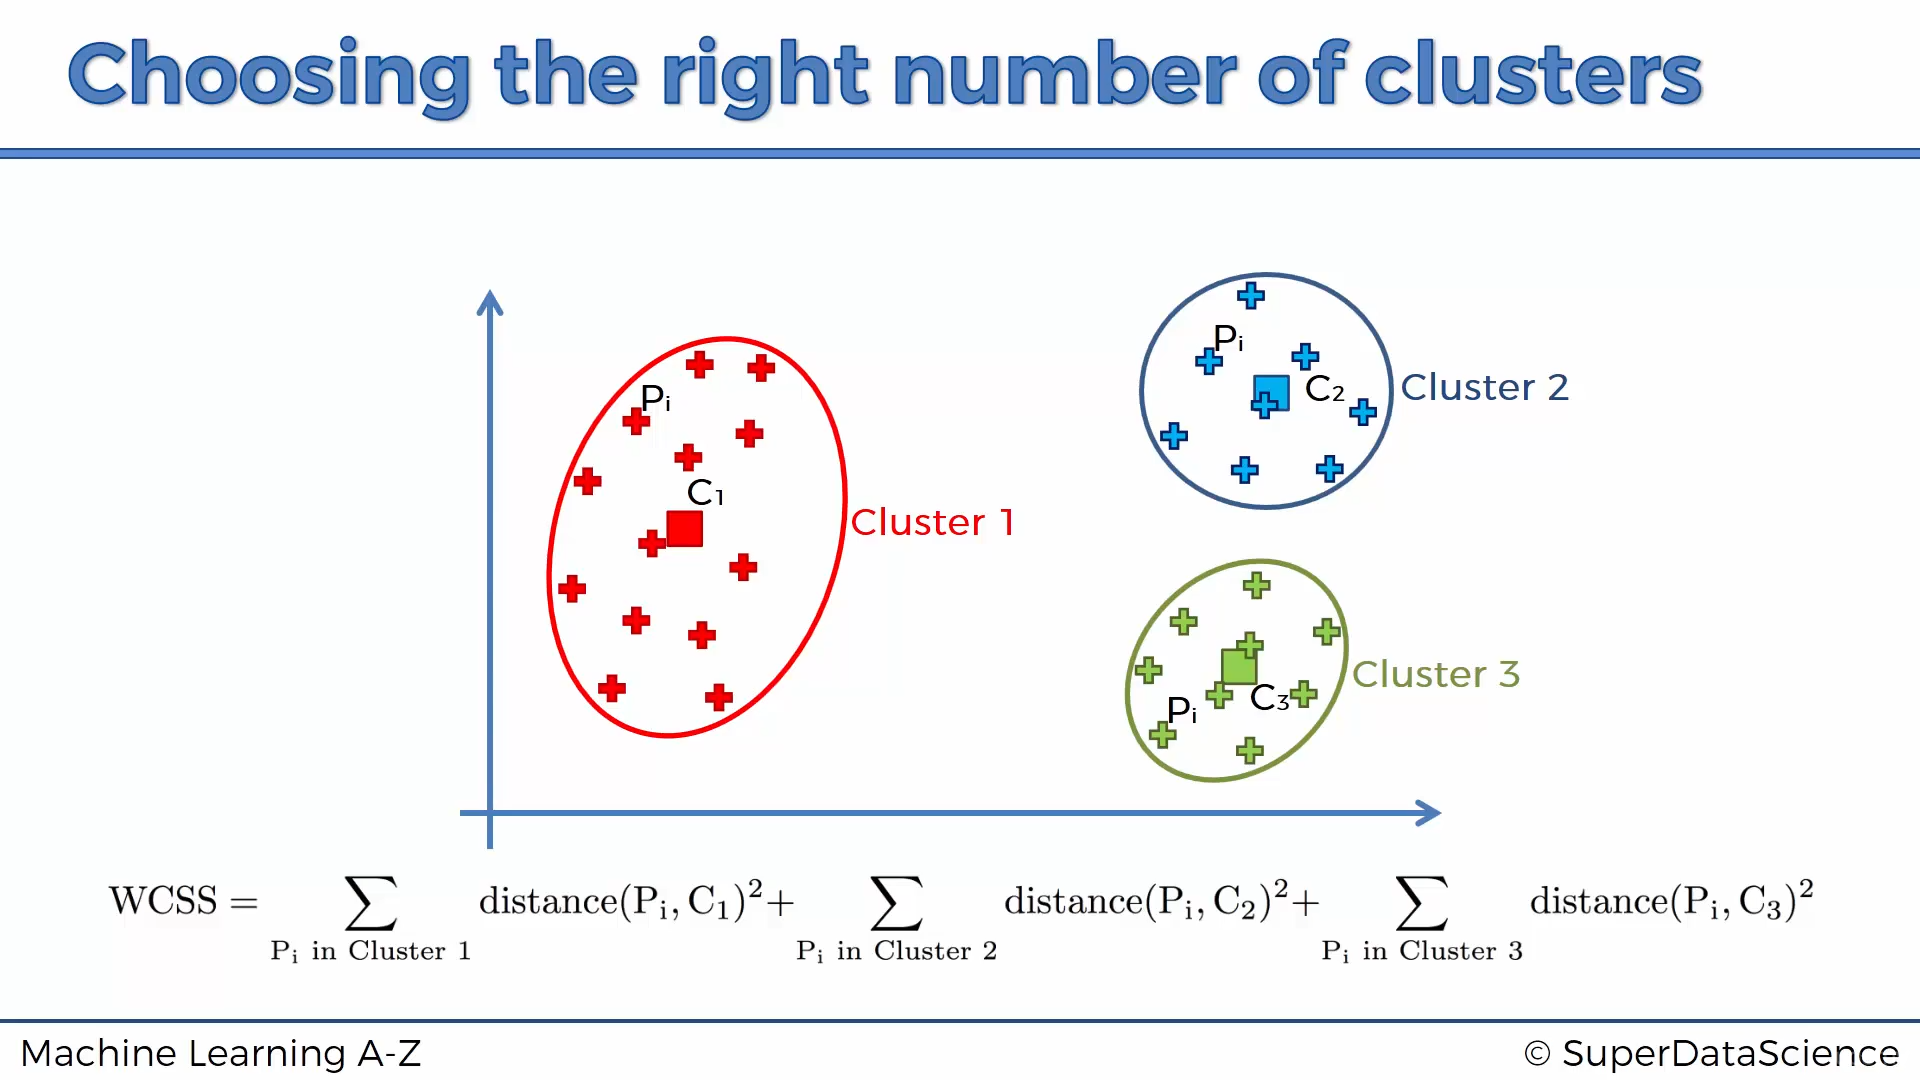

Lesser the WCSS, better the goodness of fit. But there needs to be an optimal fit. We can choose such no. of cllusters where it equals to 0 or v negligible, so for optimal method look for the **elbow** 👇🏻 (in our case 3)

**Elbow is basically the point after which change isn't very substantial.**

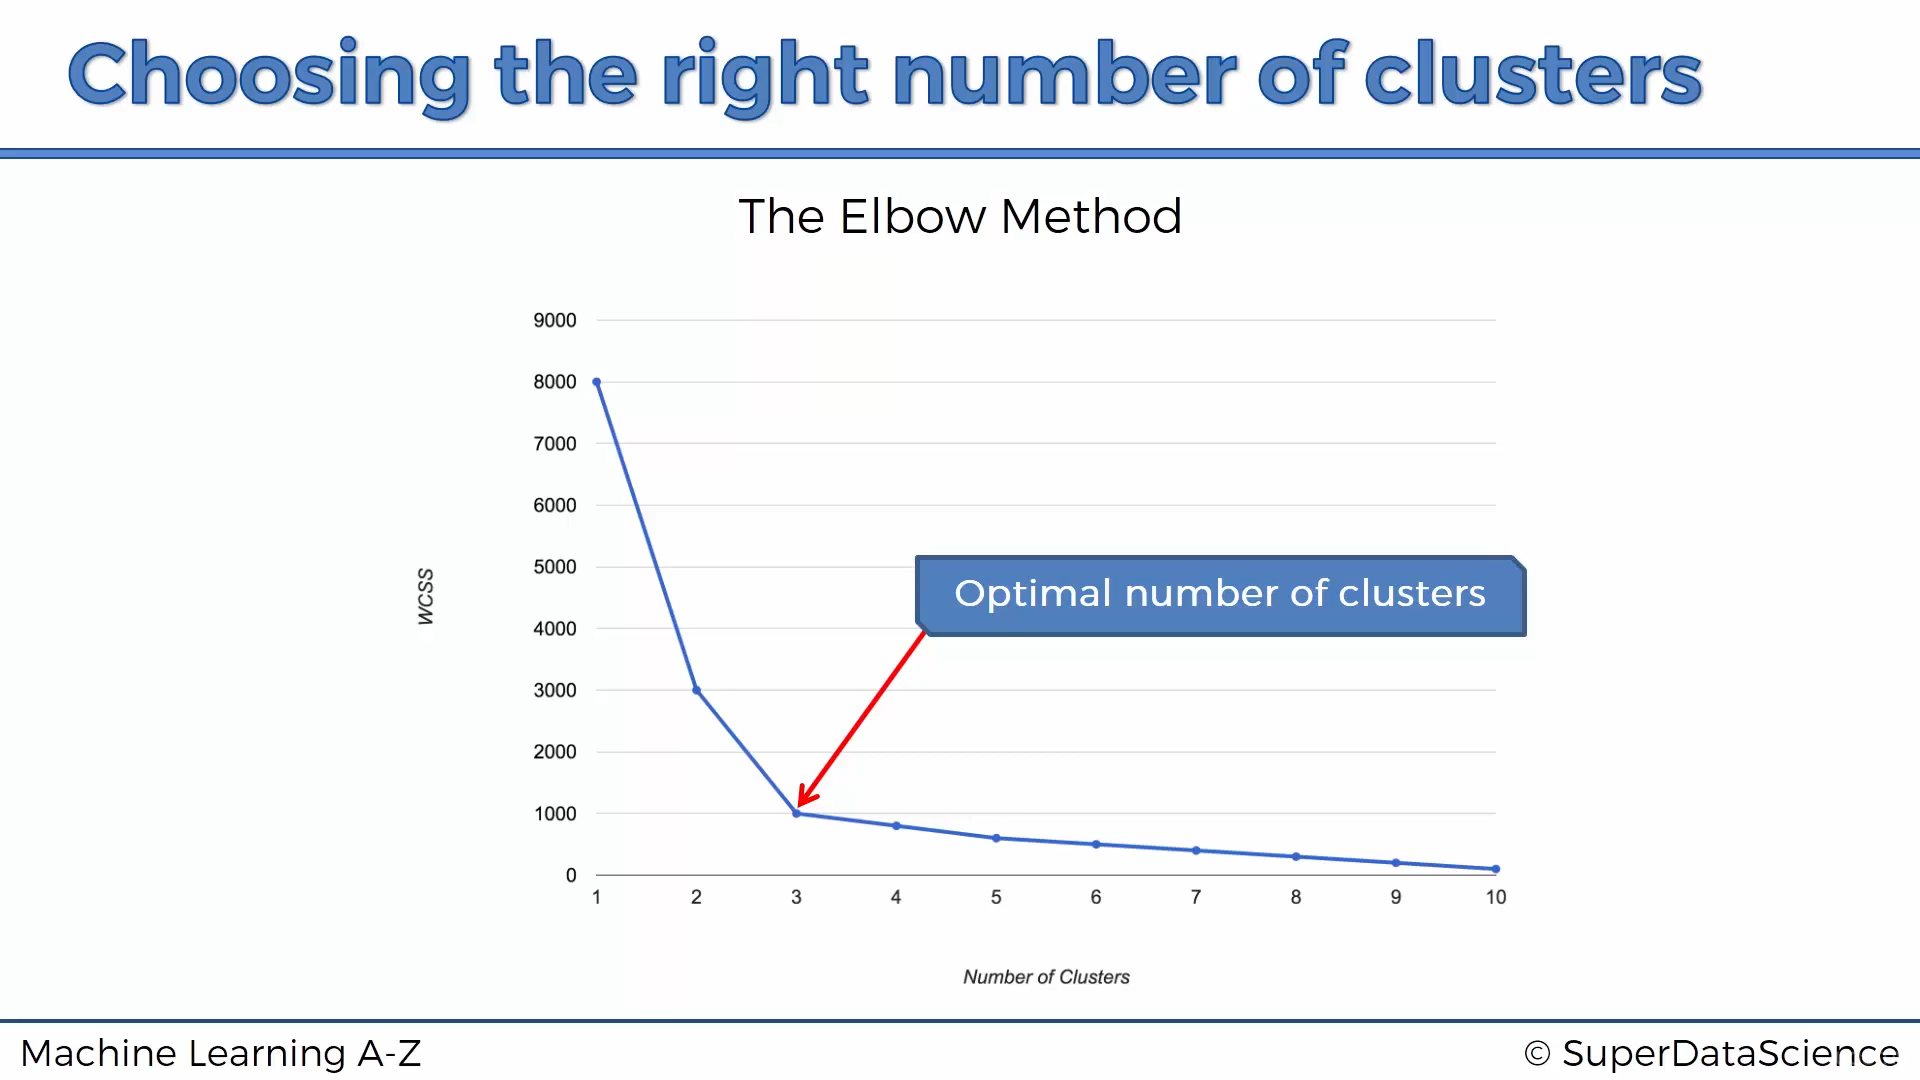

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:, [3, 4]].values

# There's no dependant variable in clustering, but pattern columns
# We just took 2 features, so that visualization become easier, we can definitely take more than 2 features to see the pattern clearly

## Using Elbow Method to find Optimal Number of Clusters

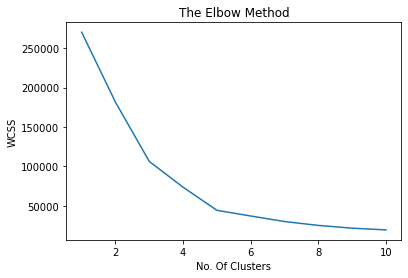

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. Of Clusters')
plt.ylabel('WCSS')
plt.show()

`k-means++` selects initial cluster centers for k-mean clustering in a smart way to speed up convergence & avoid Random Initialization Trap.

**The optimal number of clusters is `5`.**

## Training K-Means Model on the Dataset

In [5]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

## Visualising the Clusters

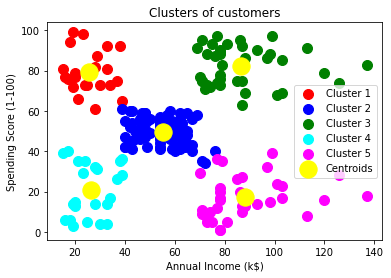

In [8]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# In first bracket column value is 0 because We're plotting Annual Income on X Axis, and that is our first column in "x"
# Similar reasoning for value 1 because We're plotting Spending Score on Y Axis, and that is our second column in "x"